In [1]:
import fastai.vision.all as fai
import fastbook as faibook

fai.matplotlib.rc('image', cmap='Greys')
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
# let's get images and transform them 
# to data with which we can work in NN, like this:
# Image -> [[0,0,255]] -> [[0.0, 0.0, 1.0]]

In [3]:
path_to_imgs = fai.untar_data(fai.URLs.MNIST_SAMPLE)
path_to_imgs

Path('/Users/mxz/.fastai/data/mnist_sample')

In [4]:
# we have some directories and files here
path_to_imgs.ls()

(#3) [Path('/Users/mxz/.fastai/data/mnist_sample/valid'),Path('/Users/mxz/.fastai/data/mnist_sample/labels.csv'),Path('/Users/mxz/.fastai/data/mnist_sample/train')]

In [5]:
# train paths
train_threes_path = (path_to_imgs/'train'/'3').ls().sorted()
train_sevens_path = (path_to_imgs/'train'/'7').ls().sorted()

train_threes_path[0]

Path('/Users/mxz/.fastai/data/mnist_sample/train/3/10.png')

In [6]:
example_img = fai.Image.open(train_threes_path[1])
example_img

In [7]:
# to view the numbers that make up this image, 
# we have to convert it to a NumPy array or a PyTorch tensor
example_img_as_numbers = fai.tensor(example_img)

# 255 -> more "bright", dark, 0 -> more transparent, white
# we can visualize those numbers, uncomment code below for it
df = fai.pd.DataFrame(example_img_as_numbers)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [8]:
# here we collect all paths to images to numbers
# Path -> Image, Paths -> Image -> Images[]
train_three_tensors = [fai.tensor(fai.Image.open(img)) for img in train_threes_path]
train_seven_tensors = [fai.tensor(fai.Image.open(img)) for img in train_sevens_path]
len(train_three_tensors)

6131

In [9]:
# stack those tensors into tensor wrapper, example
x = fai.torch.tensor([1, 2])
y = fai.torch.tensor([3, 4])
z = fai.torch.stack([x, y])
# print(z)

# we want to have this to have an option to do batch operations on them, e.g
# 1. convert all items to other type
# print(z.float())
# 2. do math on each item
# print(z * 2)

# in this case, we convert to floats and devide by most "bright" value of the color
# to convert normalize numbers between 0.0 and 1.0
# we want to do it to work more conviniently with them later
train_stacked_threes = fai.torch.stack(train_three_tensors).float() / 255
train_stacked_sevens = fai.torch.stack(train_seven_tensors).float() / 255

print(train_stacked_sevens[0].data.min().item(), train_stacked_sevens[0].data.max().item())

0.0 1.0


In [10]:
train_all_img_sample_tensors = fai.torch.cat([train_stacked_threes, train_stacked_sevens])
train_all_img_sample_tensors.size()

torch.Size([12396, 28, 28])

In [11]:
train_samples_len = train_all_img_sample_tensors.size()[0]
train_samples_len

12396

In [12]:
# TODO: why we want to do it?

# We want to change samples from a list of matrices (a rank-3 tensor) to a list of vectors (a rank-2 tensor). 
# We can do this using `view`, which is a PyTorch method that changes the shape of a tensor without changing its contents. 

In [13]:
img_width = img_height = example_img.size[0]

In [14]:
train_x = train_all_img_sample_tensors.view(train_samples_len, img_width * img_height)
# instead of samples_len we can use -1 to ask torch tensor to calclulate size for us
# "make this axis as big as necessary to fit all the data"
# all_img_sample_tensors.view(-1, img_width * img_height)
train_x.size()

torch.Size([12396, 784])

In [15]:
train_y = fai.tensor([1] * len(train_threes_path) + [0] * len(train_sevens_path)).unsqueeze(1)

In [16]:
train_dset = list(zip(train_x, train_y))
x, y = train_dset[0]
len(train_dset)

12396

In [17]:
# validation data
valid_3_path = (path_to_imgs/'valid'/'3').ls().sorted()
valid_7_path = (path_to_imgs/'valid'/'7').ls().sorted()

valid_3_tens = fai.torch.stack(
    [fai.tensor(fai.Image.open(pth)) for pth in valid_3_path]).float() / 255
valid_7_tens = fai.torch.stack(
    [fai.tensor(fai.Image.open(pth)) for pth in valid_7_path]).float() / 255

In [18]:
# TRAIN LOOP

In [19]:
def init_params(size, std=1.0): 
    return (fai.torch.randn(size)*std).requires_grad_()

In [20]:
weights = init_params((img_width * img_height, 1))

In [21]:
# # 1. Initialize the weights.
# # 2. For each image, use these weights to predict whether it appears to be 0, 1 or 2.
# # 3. Based on these predictions, calculate how good the model is (its loss).
# # 4. Calculate the gradient, which measures for each weight, how changing that weight would change the loss
# # 5. Step (that is, change) all the weights based on that calculation.
# # 6. Go back to the step 2, and repeat the process.
# # 7. Iterate until you decide to stop the training process (for instance, because the model is good enough or you don't want to wait any longer).

# train_dset = train_dset[:10]
# x, y = train_dset[0]
# print(x, y)
# inp = [0,1,2,3,4,5,6,7,1,2,8,9]

# inp_max = max(inp)
# arr_len = inp_max+1


# def num_to_bit_arr(n):
#     res = [0] * (arr_len)
#     res[n] = 1
#     return res

 
# data = [num_to_bit_arr(n) for n in inp]

# x = fai.torch.tensor(data).float()
# w = fai.torch.randn(arr_len).requires_grad_()
# # b = fai.torch.randn(1)
# b = 0.1


# y = inp

# y = [num_to_bit_arr(val) for val in y]
# y = fai.torch.tensor(y).float()
# stepsa = []
# lossa = []
# counter = 0




# # [1.0, 2.0, 3.0] -> w*x+b = [0.1132, 0.344, 1.0]
# def predict(x): return (w*x)+b
# def mse(preds, targets): return ((preds-targets)**2).mean()


# def train_loop(steps):
#     for i in range(steps):
#         global y
#         global w
#         global counter
#         counter+=1
     
#         preds = predict(x)
#         loss = mse(preds, y)
#         loss.backward()
        
        
#         w.data -= w.grad.data * 0.001
#         w.grad = None
#         stepsa.append(counter)
#         lossa.append(loss.item())
        
#     print(loss.item())

In [127]:
# 1. Initialize the weights.
# 2. For each image, use these weights to predict whether it appears to be 0, 1 or 2.
# 3. Based on these predictions, calculate how good the model is (its loss).
# 4. Calculate the gradient, which measures for each weight, how changing that weight would change the loss
# 5. Step (that is, change) all the weights based on that calculation.
# 6. Go back to the step 2, and repeat the process.
# 7. Iterate until you decide to stop the training process (for instance, because the model is good enough or you don't want to wait any longer).

ds_here = train_dset
v_dset = train_dset[11000:11030]


w = fai.torch.randn(x.size()).requires_grad_()
# b = fai.torch.randn(1).requires_grad_()
b = 0.1

stepsa = []
lossa = []
counter = 0




# [1.0, 2.0, 3.0] -> w*x+b = [0.1132, 0.344, 1.0]
def predict(x): return (w*x)+b
def mse(preds, targets): return ((preds-targets)**2).mean()
def mnist_loss(predictions, targets):
    return fai.torch.where(targets==1, 1-predictions, predictions).mean()

def train_loop(steps):
    for i in range(steps):
        x, y = ds_here[i]
        global counter
        counter+=1
     
        preds = predict(x)
        loss = mnist_loss(preds, y)
        loss.backward()
        
        
        w.data -= w.grad.data * 0.1
        # b.data -= b.grad.data * 0.01
        w.grad = None
        # b.grad = None
        stepsa.append(counter)
        lossa.append(loss.item())
        
    print(loss.item())

0.892475962638855


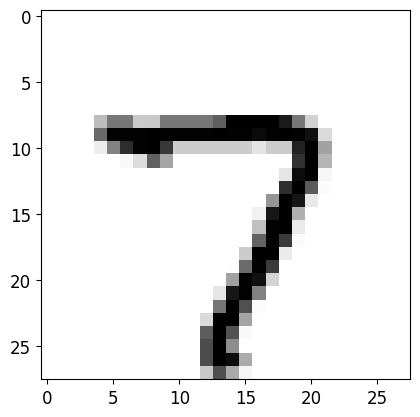

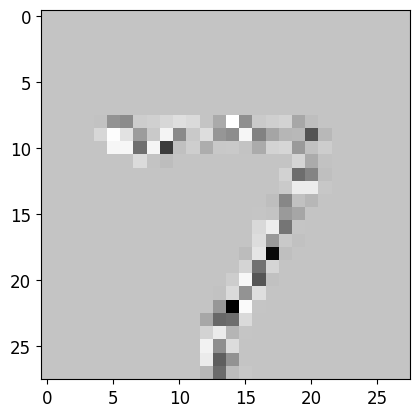

In [128]:
train_loop(1)
ress = []

xx, yy = v_dset[3]
preds = predict(xx)

with fai.torch.no_grad(): 
    plt.imshow(xx.view(28,28))
    plt.show()

with fai.torch.no_grad(): 
    plt.imshow(preds.view(28,28))
    plt.show()
    # ress.append(preds.argmax().item() == n)
# acc = (sum(ress) / len(ress)) * 100
# acc

In [79]:
# train_loop(10000)
# ress = []

# for n in inp:
#     preds = predict(fai.torch.tensor(num_to_bit_arr(n)))
#     print(preds.argmax().item(), preds.max().item(), n)
#     ress.append(preds.argmax().item() == n)
# acc = (sum(ress) / len(ress)) * 100
# acc

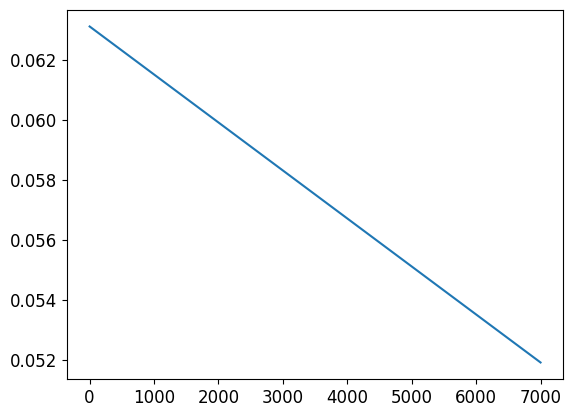

In [83]:
plt.plot(stepsa, lossa)